In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Google Play Store Apps Analysis

Google Play, which was launched on March 6, 2012, brings together the Android Market, Google Music, and the Google eBookstore under one brand, and serves as the official app store for the Android operating system. As a new Android user myself, who recently switched from Apple ecosystem for a shinny Google Pixel 3 smartphone, it is intersting (and perhaps necessary) for me to do a little research and analysis on the app distribution service which I'm gonna be constantly using for the next couple of years. 

In this report, I'm going to briefly analyze the Android app market with web scraped data of 10k Play Store apps(obtained from Kaggle). For our purposes I'm going to assume that it is representative of the 2.6 million apps that are currently available for download in Google Play (ref: statista.com, as of December, 2018). To start the analysis, first I want to see what kinds of information are provided in this file:

In [71]:
apps = pd.read_csv('googleplaystore.csv')
apps.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [72]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


This file contains an app name, category of the app, rating, number of reviews, app size, install counts, price (free or paid), content rating, genre, last updated date, current app version number and required minimum Android OS version. And all the columns in this file are object type except for 'Rating' column which is float. To get a big picture of this data, first let's find out how many types of apps are in the app store and how many apps are in each type:

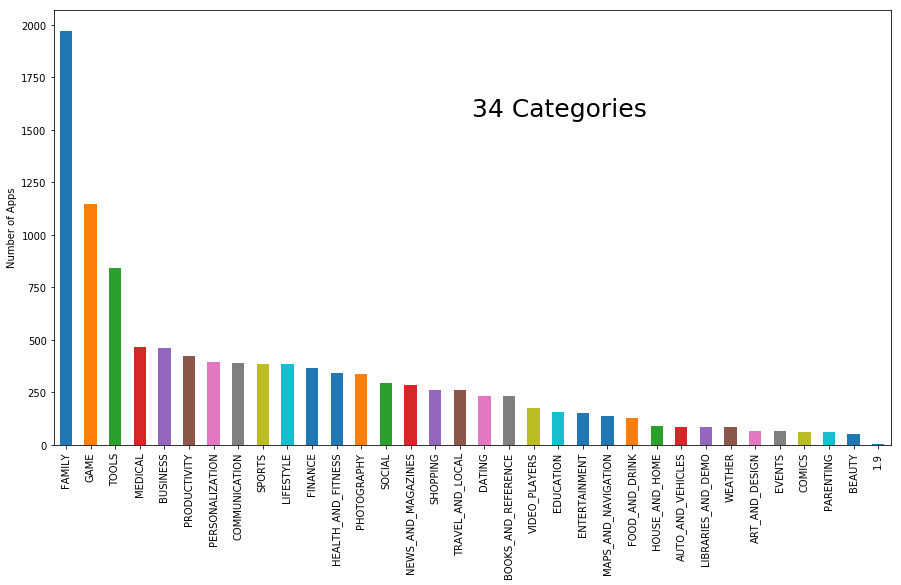

In [73]:
ax=apps['Category'].value_counts().plot(kind='bar',figsize=(15,8))
plt.text(0.5, 0.8, '34 Categories',fontsize=25, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes)
plt.ylabel('Number of Apps')
plt.show()

The 10,000+ Google Play apps are categorized into 34 different types, ranging from business to comics. Among those, Three types (Family, Game and Tools) stand out as they combined contain close to 40% of the total number of apps. Family related apps are developers' favorite, with close 2000 apps in the store. Following are games and tools apps which both contain more than 750 apps. The rest 31 types of apps each contains no more than 500 apps in the store and together they make up 60% of the total apps. Now let's see how the number of free apps is compared to paid apps:

In [74]:
apps['Type'].value_counts().head(2)

Free    10039
Paid      800
Name: Type, dtype: int64

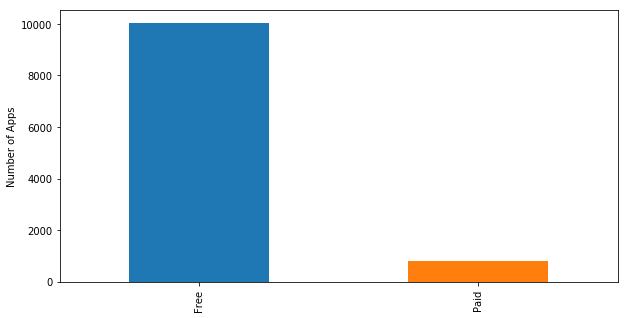

In [75]:
apps['Type'].value_counts().head(2).plot(kind='bar', figsize=(10,5))
plt.ylabel("Number of Apps")
plt.show()

Gladly, Among the ~11,000 apps in the file, over 10,000 apps are free, making the free app to total app ratio > 90%. Next let's dig into the data and see how the app sizes are distributed among the apps:

In [76]:
size = pd.to_numeric(apps['Size'].str[:-1], errors='coerce')
size.mean()

37.03544013121925

In [77]:
size.median()

15.0

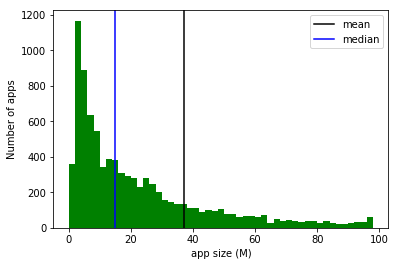

In [78]:
plt.hist(size, range(0,100,2), color='green')
plt.ylabel('Number of apps')
plt.xlabel('app size (M)')
plt.axvline(size.mean(), color='black',label='mean')
plt.axvline(size.median(), color='blue', label='median')
plt.legend(loc=0)
plt.show()

The average size of the apps is 37M and the median is 15M, those two numbers are more than 20M apart, so the size distribution is not normal. There are some exceptionally large apps that drag the mean away from the median. 

# Analytic Questions

## #1 How are the ratings distributed among the most popular three categories, which category is more well rated?

On the developer side, Family, games and tools related apps are absolutely their favorite, with apps in those categories make up a big chunk of the total apps in the app store. Let's take a look at the users' reception of the apps, by visualize the ratings distribution in the three categories. Is there a big difference in the ratings and if so, which category is the most popular by users?

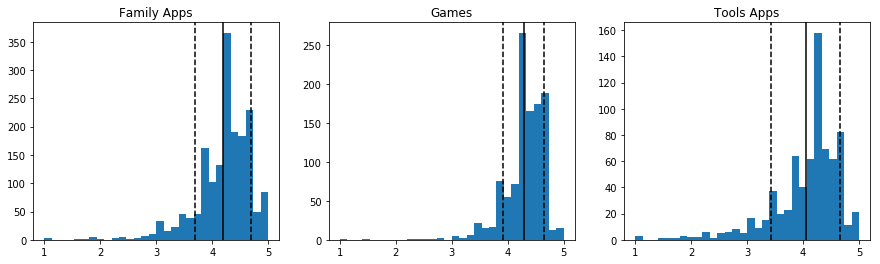

In [79]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
family = apps[apps['Category']=='FAMILY']['Rating'].dropna()
game = apps[apps['Category']=='GAME']['Rating'].dropna()
tools = apps[apps['Category']=='TOOLS']['Rating'].dropna()
axes[0].hist(family, bins=30)
axes[0].axvline(family.mean(),color='black',label='mean')
axes[0].axvline(family.mean()+family.std(),color='black', ls='--')
axes[0].axvline(family.mean()-family.std(),color='black', ls='--')
axes[0].set_title('Family Apps')

axes[1].hist(game, bins=30)
axes[1].axvline(game.mean(),color='black',label='mean')
axes[1].axvline(game.mean()+game.std(),color='black', ls='--')
axes[1].axvline(game.mean()-game.std(),color='black', ls='--')
axes[1].set_title('Games')

axes[2].hist(tools, bins=30)
axes[2].axvline(tools.mean(),color='black',label='mean')
axes[2].axvline(tools.mean()+tools.std(),color='black', ls='--')
axes[2].axvline(tools.mean()-tools.std(),color='black', ls='--')
axes[2].set_title('Tools Apps')
plt.show()

In [80]:
family.describe()

count    1747.000000
mean        4.192272
std         0.508026
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [81]:
game.describe()

count    1097.000000
mean        4.286326
std         0.365375
min         1.000000
25%         4.100000
50%         4.400000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [82]:
tools.describe()

count    734.000000
mean       4.047411
std        0.616143
min        1.000000
25%        3.800000
50%        4.200000
75%        4.400000
max        5.000000
Name: Rating, dtype: float64

The histograms of ratings distribution for family, games and tools apps are shown above. Games show an higher average rating of 4.28 than family's 4.19 and tools' 4.04. Tools apps shows the biggest standard deviation of 0.62 meaning that users' opinion of those apps are varied. The histograms can't give us a clear comparison of the ratings, let's try boxplot sharing the y axis and see which category shows higher median rating:

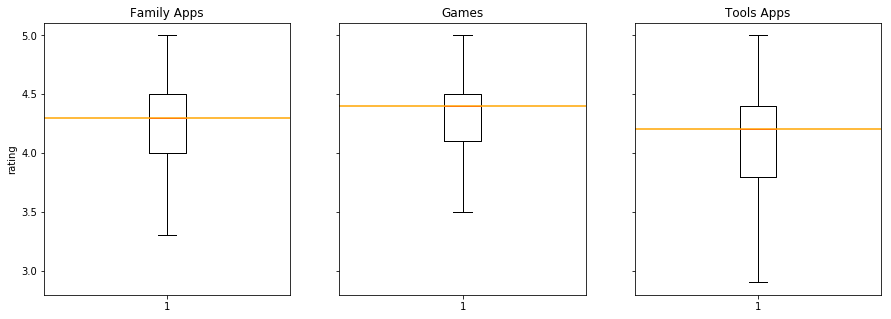

In [83]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey = True)
axes[0].boxplot(family, showfliers=False)
axes[1].boxplot(game, showfliers=False)
axes[2].boxplot(tools, showfliers=False)
axes[0].axhline(family.median(),color='orange',label='median')
axes[1].axhline(game.median(),color='orange',label='median')
axes[2].axhline(tools.median(),color='orange',label='median')
axes[0].set_ylabel('rating')
axes[0].set_title('Family Apps')
axes[1].set_title('Games')
axes[2].set_title('Tools Apps')
plt.show()

the boxplots compare the general ratings among the three categories with a bit more clarity, game apps show better ratings with smaller variance.

## #2 What kind of apps get more reviews on average? what kind get least reviews?

Besides rating score, review number is another important indicator of an app's popularity among users. Let's find out what apps get more average review count and how are the review numbers vary among the categories:

In [84]:
import seaborn as sns

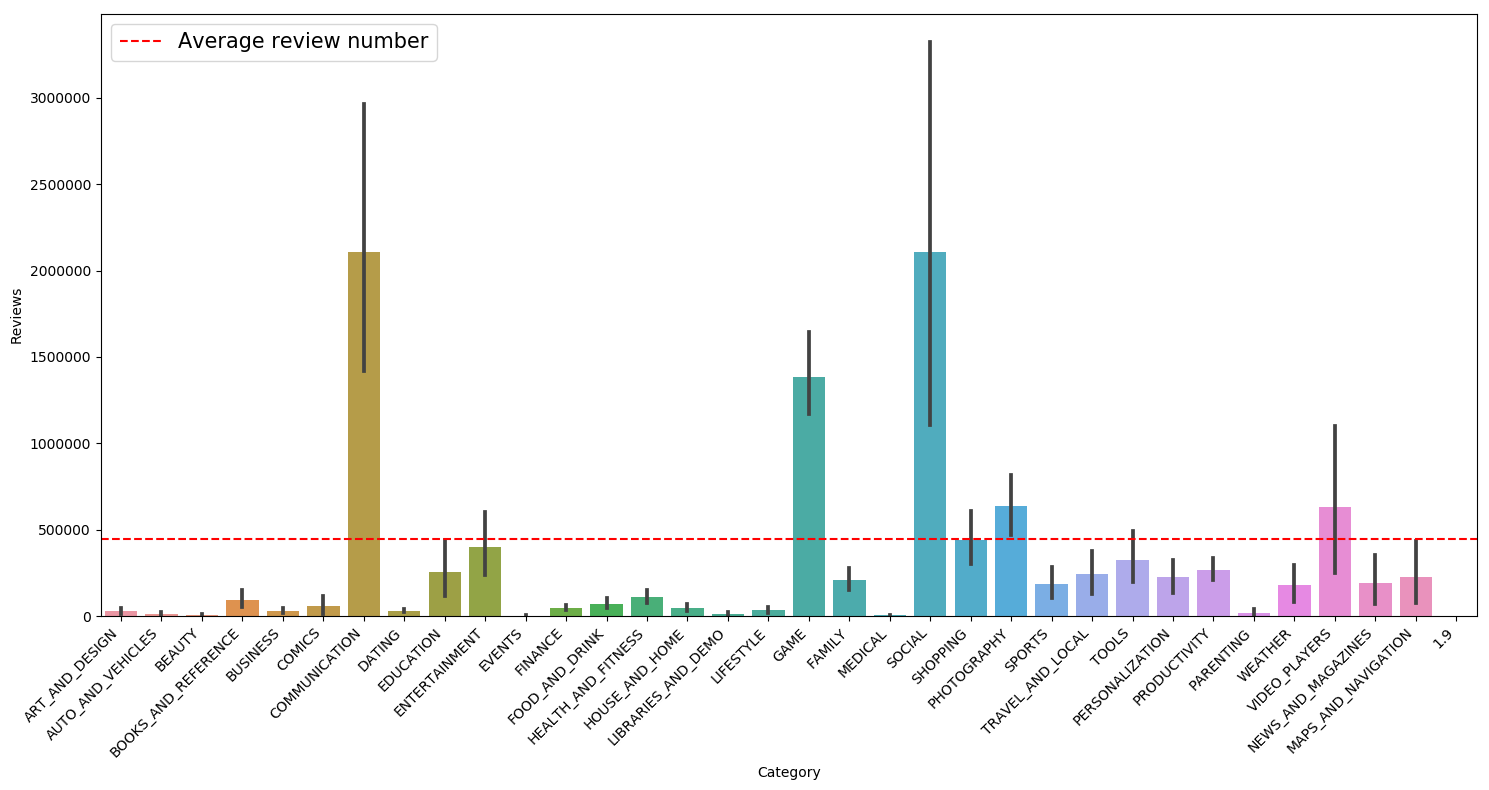

In [85]:
reviews = pd.to_numeric(apps['Reviews'], errors='coerce')
fig = plt.figure(figsize=(15,8), dpi = 100)
ax = sns.barplot(x='Category',y=reviews,data=apps, estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.axhline(y=reviews.mean(), label='Average review number', color='r', ls='--')
plt.legend(loc=0, fontsize=15)
plt.tight_layout()
plt.show()

In [86]:
reviews.describe()

count    1.084000e+04
mean     4.441529e+05
std      2.927761e+06
min      0.000000e+00
25%      3.800000e+01
50%      2.094000e+03
75%      5.477550e+04
max      7.815831e+07
Name: Reviews, dtype: float64

There are three categories that get significantly more reviews than others: communication, games, and social media apps. Those three categories on average get over 1 million reviews per app, which is more than double of the rest of categories. On the other hand, apps that are beauty, events and medical related get so few reviews that we can't even see the bars on the plot. The average review number across the app store is 0.44 million, among the 34 categories, only 5 exceed the average review number (communication, game, social, photography and video players).

## #3 What are the target users of the apps? Are they any different in different categories?

Apps of a specific category might focus on a certain group of users based on the app content. It would be interesting to investigate if there's any correlation between app category and content rating. To do this, I want to analyze the content rating distribution in six popular app categories: Family, Games, Tools, Communication, Social and Medical. With a pie chart, we can clearly see the portion of a certain content rating among the total apps in that category.

In [87]:
family_content = apps[apps['Category']=='FAMILY']['Content Rating'].dropna().value_counts()
game_content = apps[apps['Category']=='GAME']['Content Rating'].dropna().value_counts()
tool_content = apps[apps['Category']=='TOOLS']['Content Rating'].dropna().value_counts()
comm_content = apps[apps['Category']=='COMMUNICATION']['Content Rating'].dropna().value_counts()
social_content = apps[apps['Category']=='SOCIAL']['Content Rating'].dropna().value_counts()
medical_content = apps[apps['Category']=='MEDICAL']['Content Rating'].dropna().value_counts()

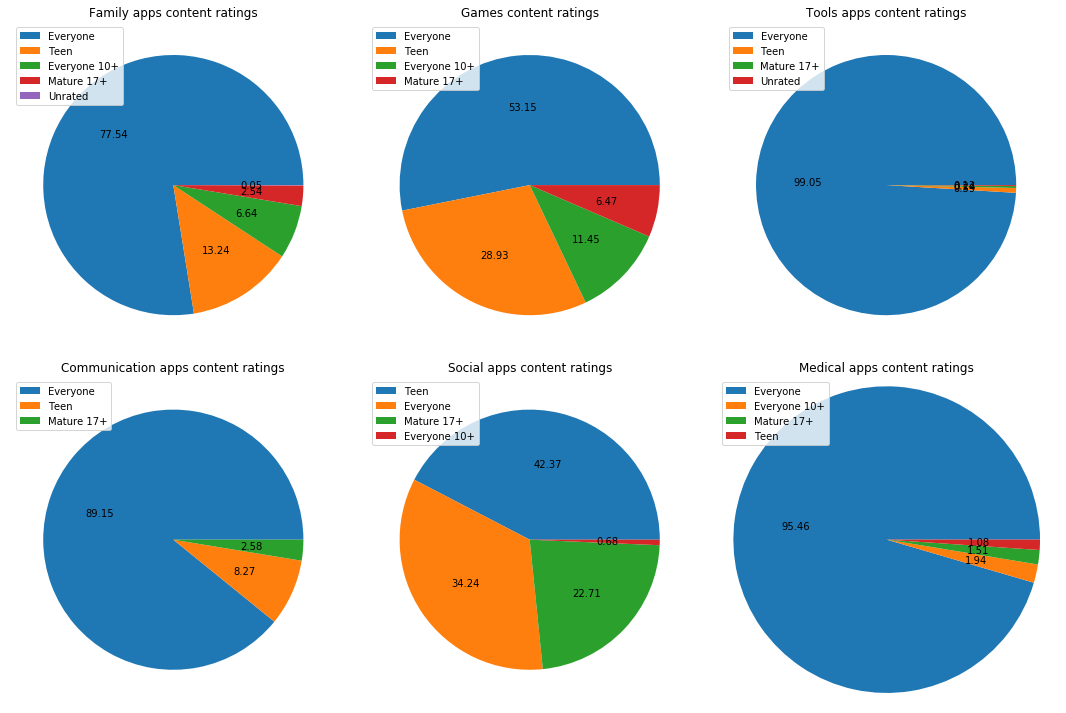

In [88]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[0,0].pie(family_content, autopct='%.2f')
axes[0,0].legend(family_content.index, loc=2)
axes[0,0].set_title('Family apps content ratings')

axes[0,1].pie(game_content, autopct='%.2f')
axes[0,1].legend(game_content.index, loc=2)
axes[0,1].set_title('Games content ratings')

axes[0,2].pie(tool_content, autopct='%.2f')
axes[0,2].legend(tool_content.index, loc=2)
axes[0,2].set_title('Tools apps content ratings')

axes[1,0].pie(comm_content, autopct='%.2f')
axes[1,0].legend(comm_content.index, loc=2)
axes[1,0].set_title('Communication apps content ratings')

axes[1,1].pie(social_content, autopct='%.2f')
axes[1,1].legend(social_content.index, loc=2)
axes[1,1].set_title('Social apps content ratings')

axes[1,2].pie(medical_content, autopct='%.2f')
axes[1,2].legend(medical_content.index, loc=2)
axes[1,2].set_title('Medical apps content ratings')

plt.tight_layout()
plt.axis('equal')
plt.show()

In 5 out of the 6 categories above, the majority of the apps (>50%) contents are suitable for 'everyone', this percentage is especially high in tools and medical apps (99% and 95%). In categories of 'Games' and 'Social', more than 25% of apps require their users to be teen and up. Also, In Game apps, an unignorable portion of 6.5% of apps require the app users to be at least 17 years old.

## #3 What are the install numbers in free and paid games? Are they any different? 

One would imagine that free games should on average have more download numbers compared to paid games, to investigate if this statement is true, let's visualize the portion of different install count levels among free and paid games respectively:

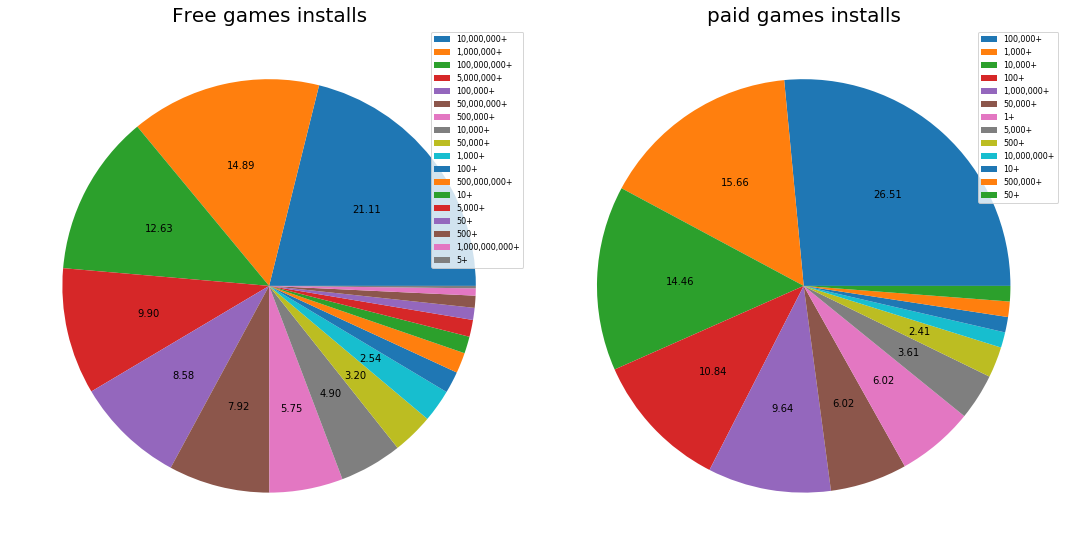

In [89]:
game_free = apps.loc[(apps['Category']=='GAME') & (apps['Type']=='Free')]['Installs'].dropna().value_counts()
game_paid = apps.loc[(apps['Category']=='GAME') & (apps['Type']=='Paid')]['Installs'].dropna().value_counts()

def my_autopct(pct):
    return ('%.2f' % pct) if pct > 2 else ''


fig, axes = plt.subplots(1,2, figsize=(15,10))
axes[0].pie(game_free, autopct=my_autopct, radius=1)
axes[0].legend(game_free.index, loc=0, fontsize =8)
axes[0].set_title('Free games installs', fontsize = 20)

axes[1].pie(game_paid, autopct=my_autopct, radius=1)
axes[1].legend(game_paid.index, loc=0, fontsize =8)
axes[1].set_title('paid games installs', fontsize=20)

plt.tight_layout()
plt.show()

From the pie charts above, we see that over 12.6% of free games have over 100 million installs, and none of the paid games reaches 100 million; 21.1% of free games have over 10 million installs, while this number is less than 2% among paid games; close to 15% of free games have over 1 million installs, this number is 9.4% among paid games. All of the data above shows that free apps get higher chance of high download count than paid games.

# Future Research Proposal

## Andoid game OS compatibility vs popularity

Google releases a new version of their mobile operating system (Android) every year. Every new version comes with a bunch of OS updates that are meant to match up the newest developments in hardware and software designs. However, for many reasons, new versions of Android system do not get adopted by users or mobile device manufacturers immediately, which results in multiple generations of Android systems being distributed in market at the same time.

App developers have to decide whether to take full advantage of the newest features that come only with the new version of Android (or optimize their app based on the new Android version) and lose users who are still on older generations of OS, or compromise their app features and include users of earlier generations Android.

To help the developers make their decisions, I want to use meachine learning to help them decide how multi-gen OS compatible their apps should be. I would create a model that takes in consideration of: (1)how Android systems are distributed in market right now, (2)how the shares change with time based on previous years data (3)how are potential users distributed in different OS gens (maybe people who explore apps more have higher chance of using more recent system?), etc.

This would require a lot of additional data from multiple years, but would be very helpful for developers whose apps are very system specific, such as large games, media editing apps and such.